In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


from google.colab.patches import cv2_imshow

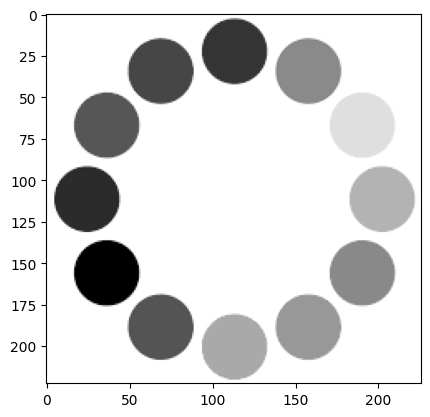

In [3]:
img = cv2.imread('/content/drive/MyDrive/circles.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')



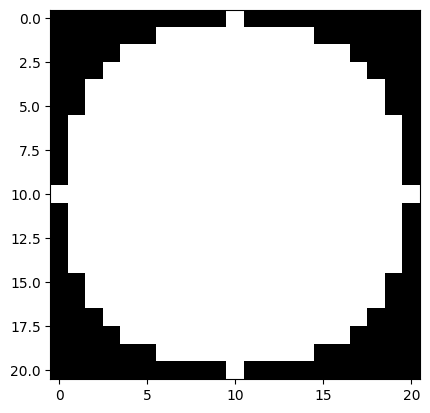

In [4]:

# Defining circular structuring element
def disc_kernel(radius):
  x, y = np.meshgrid(np.arange(-radius, radius + 1), np.arange(-radius, radius + 1))
  kernel = (x**2 + y**2 <= radius**2).astype(np.uint8)
  return kernel

kernel = disc_kernel(10)
plt.imshow(kernel,cmap='gray')


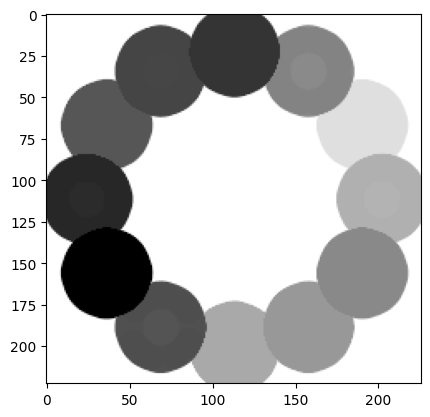

In [5]:
# Erosion
kernel = disc_kernel(8)
erosion = cv2.erode(img, kernel, iterations=1)
plt.imshow(erosion,cmap='gray')


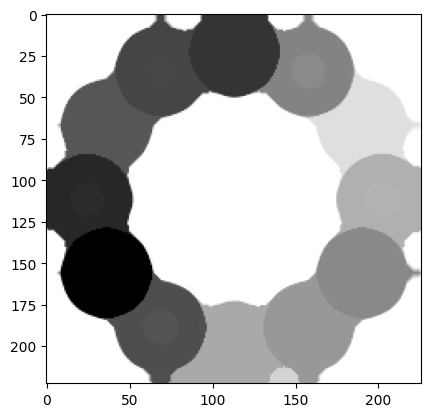

In [6]:
# Opening
kernel = disc_kernel(9)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening,cmap='gray')

In [7]:
# Count total number of balls present in this image
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Number of balls:',len(contours))

Number of balls: 1


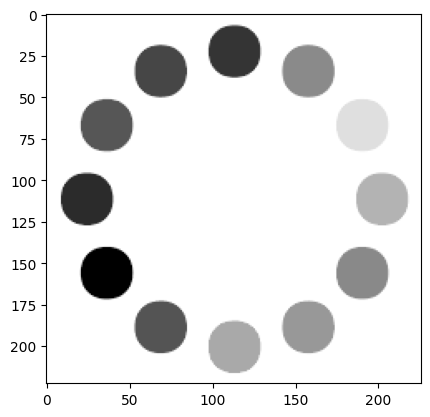

In [8]:

# Dilation
kernel = disc_kernel(4)
dilation = cv2.dilate(img, kernel, iterations=1)
plt.imshow(dilation,cmap='gray')

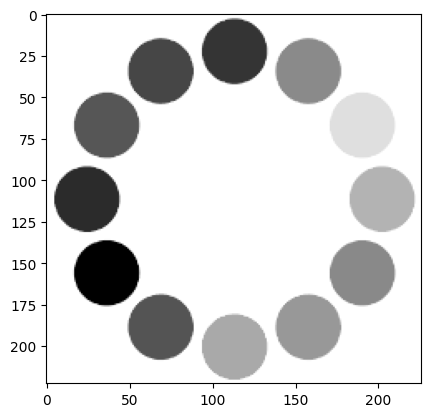

In [9]:

# Closing
kernel = disc_kernel(6)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(closing,cmap='gray')

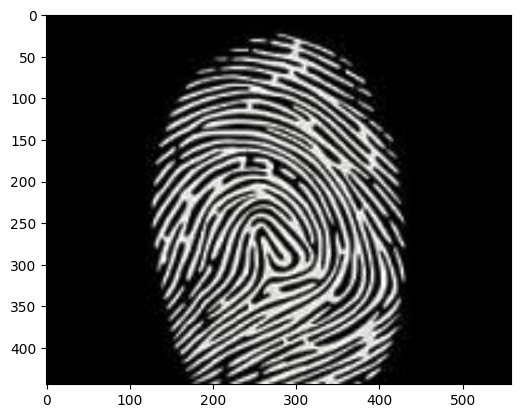

In [17]:
img1 = abs(255-cv2.imread('/content/drive/MyDrive/imgs/fingerscan.jpg'))
img1 = cv2.resize(img1, (img1.shape[1]*3,img1.shape[0]*3))
plt.imshow(img1,cmap='gray')

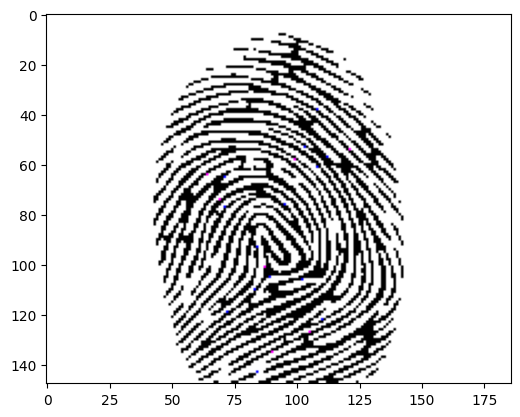

In [20]:
# Thresholding
(thresh, img1) = cv2.threshold(img1, 110, 255, cv2.THRESH_BINARY)
plt.imshow(img1,cmap='gray')

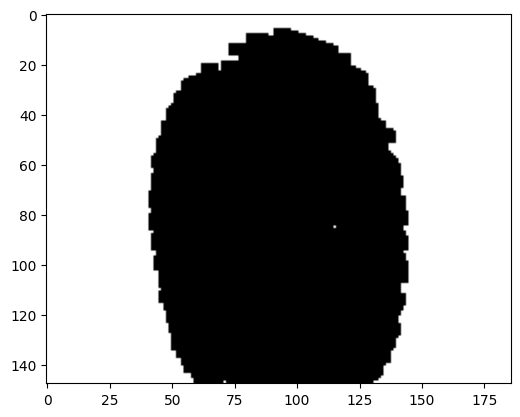

In [21]:
# Erosion
kernel = np.ones((5,5),np.uint8)
eroded = cv2.erode(img1, kernel, iterations=1)
plt.imshow(eroded)

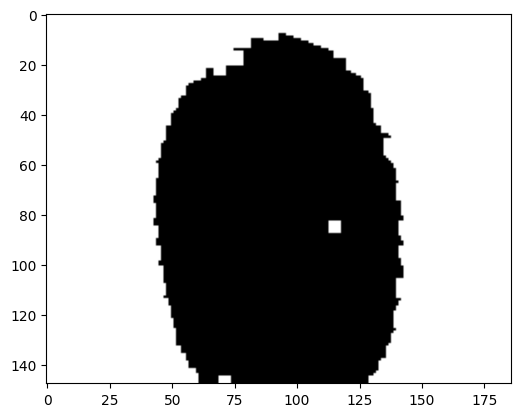

In [22]:

# Dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(eroded, kernel, iterations=2)
plt.imshow(dilated)


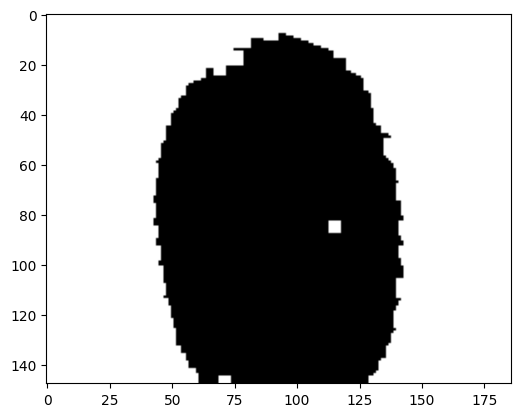

In [23]:

# Opening
kernel = np.ones((3,3),np.uint8)
open = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(open,cmap='gray')